<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#La-régression-linéaire" data-toc-modified-id="La-régression-linéaire-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>La régression linéaire</a></span><ul class="toc-item"><li><span><a href="#Les-équations-normales" data-toc-modified-id="Les-équations-normales-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Les équations normales</a></span></li><li><span><a href="#Régression-Linéaire" data-toc-modified-id="Régression-Linéaire-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Régression Linéaire</a></span></li></ul></li><li><span><a href="#Choix-de-la-métrique-de-performance" data-toc-modified-id="Choix-de-la-métrique-de-performance-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Choix de la métrique de performance</a></span><ul class="toc-item"><li><span><a href="#Mean-absolute-error" data-toc-modified-id="Mean-absolute-error-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Mean absolute error</a></span></li><li><span><a href="#Mean-squared-error" data-toc-modified-id="Mean-squared-error-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Mean squared error</a></span></li><li><span><a href="#Mean-squared-logarithmic-error" data-toc-modified-id="Mean-squared-logarithmic-error-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Mean squared logarithmic error</a></span></li><li><span><a href="#Median-absolute-error" data-toc-modified-id="Median-absolute-error-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Median absolute error</a></span></li><li><span><a href="#$R^{2}$-score,-the-coefficient-of-determination" data-toc-modified-id="$R^{2}$-score,-the-coefficient-of-determination-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>$R^{2}$ score, the coefficient of determination</a></span></li></ul></li><li><span><a href="#La-descente-de-gradient" data-toc-modified-id="La-descente-de-gradient-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>La descente de gradient</a></span><ul class="toc-item"><li><span><a href="#Descente-de-gradient-stochastique" data-toc-modified-id="Descente-de-gradient-stochastique-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Descente de gradient stochastique</a></span></li></ul></li></ul></div>

# La régression linéaire

In [1]:
import time
import os
import warnings
# os.chdir(r"C:\Solutions")

import pandas as pd
import seaborn as sns

%pylab inline

warnings.filterwarnings(action="ignore")
plt.style.use('seaborn-poster')
sns.set(font_scale=3)
np.random.seed(1234)

Populating the interactive namespace from numpy and matplotlib


In [2]:
taille_echantillon = 100
X = 2 * np.random.rand(taille_echantillon, 1)
y = 4 + 3 * X + np.random.randn(taille_echantillon, 1)

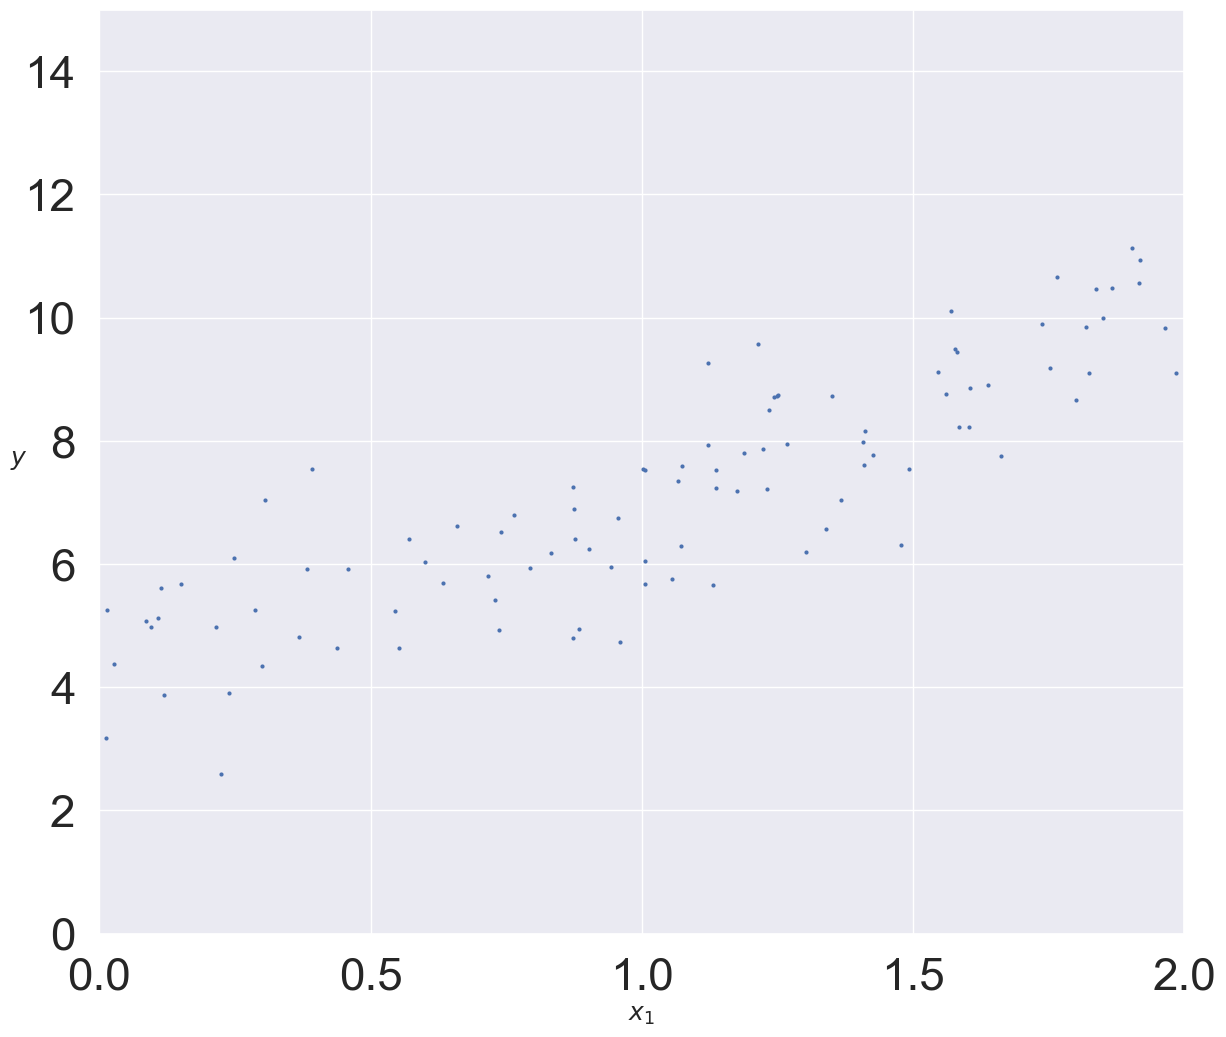

In [3]:
plt.figure(figsize=(14,12))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [4]:
y.shape

(100, 1)

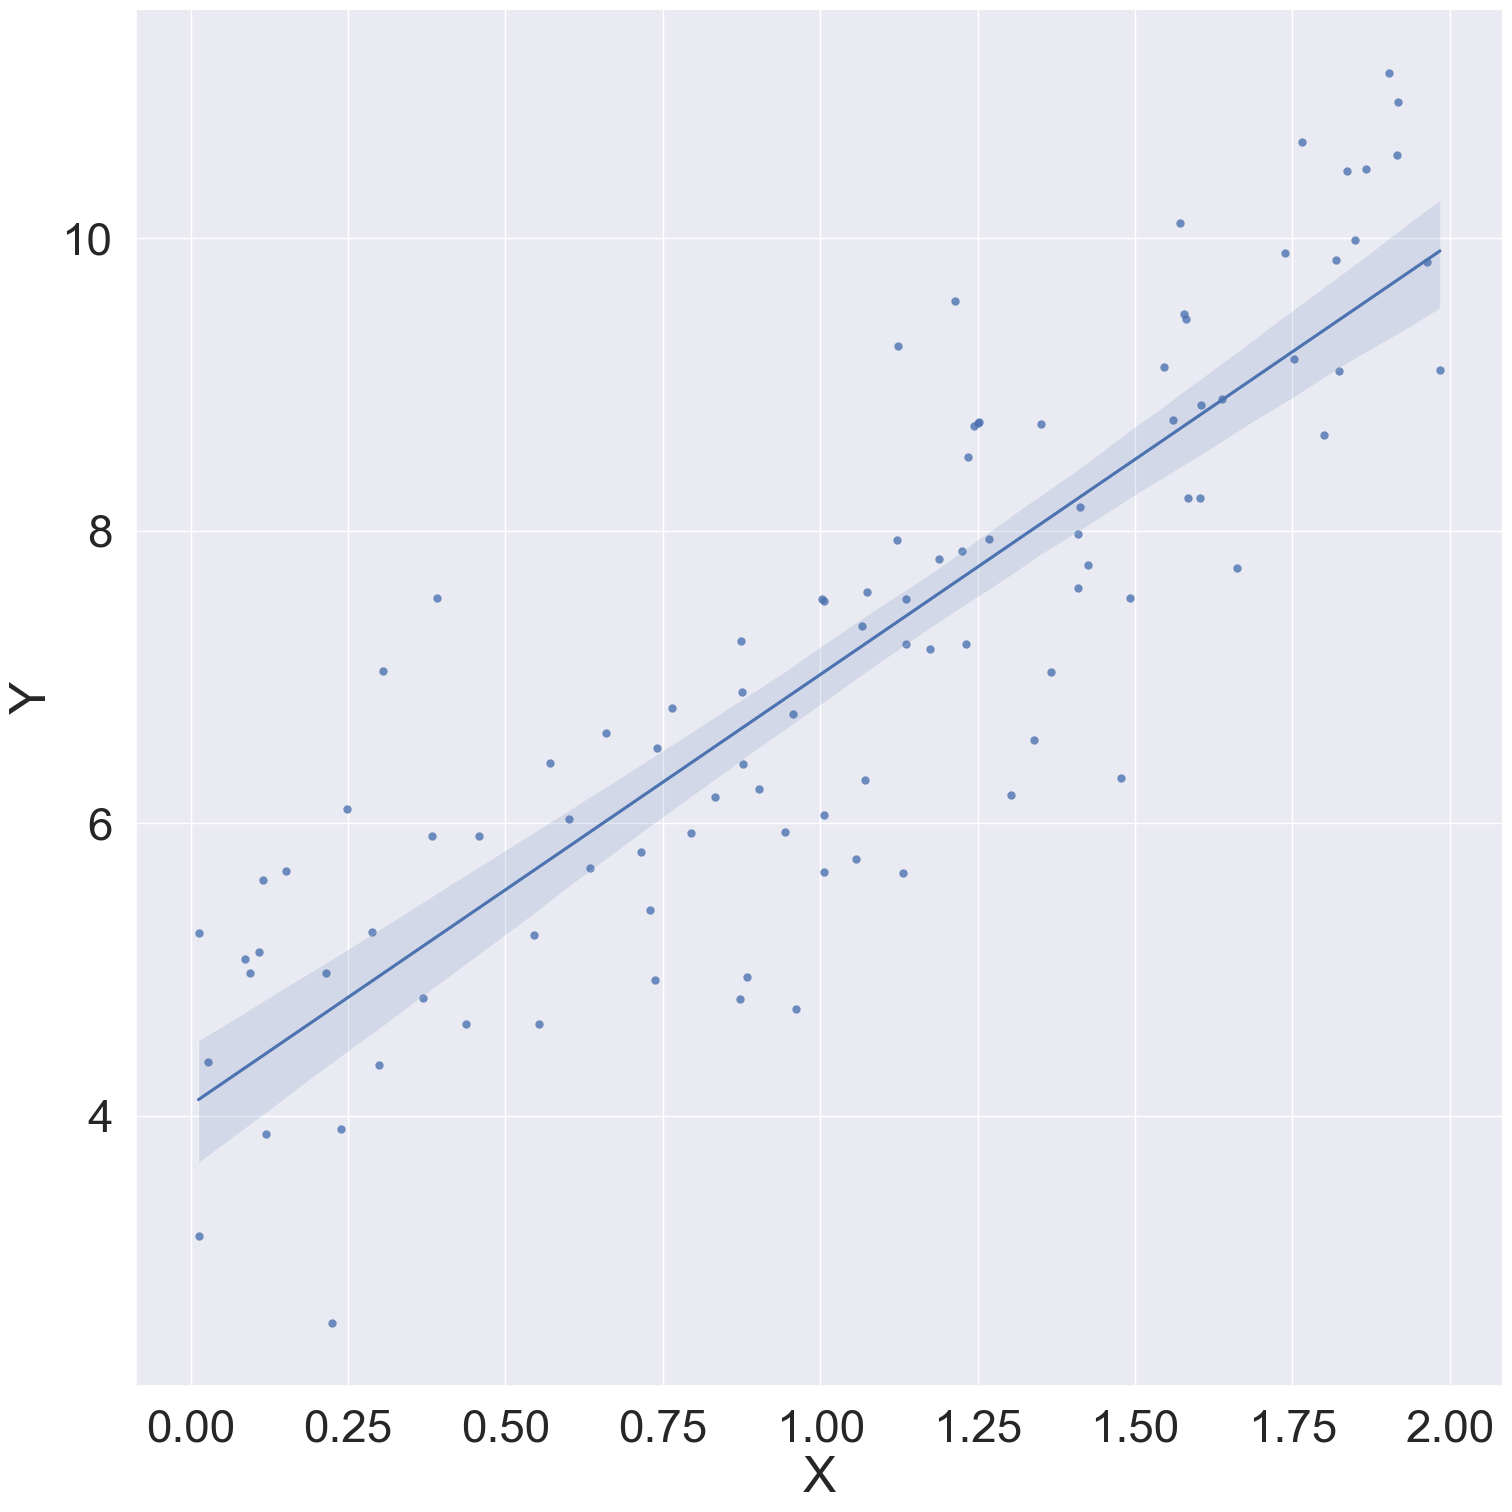

In [4]:
import seaborn as sns
sns.lmplot(x="X", y="Y", data=pd.DataFrame({'X':X[:,0],'Y':y[:,0]}), size =16)

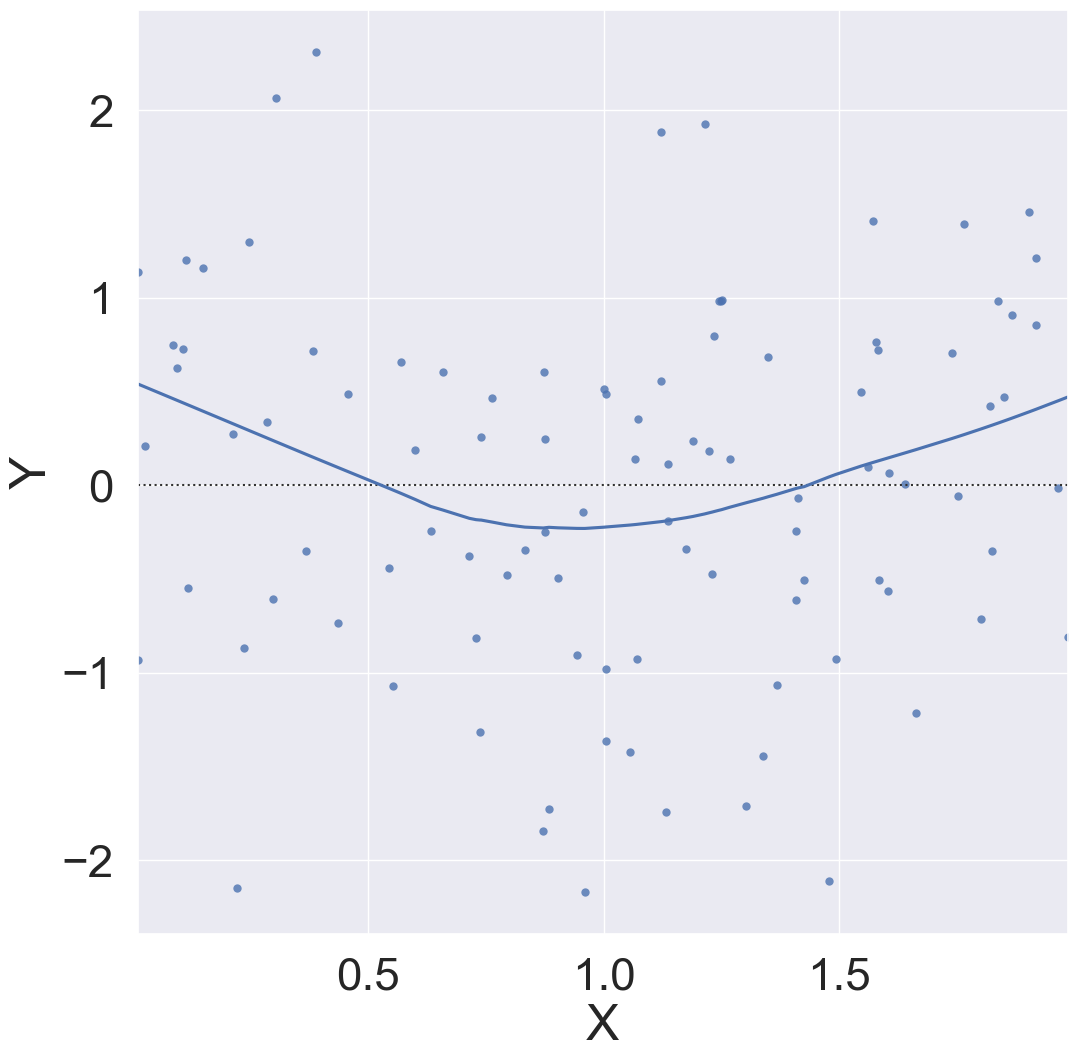

In [5]:
plt.figure(figsize=(12,12))
sns.residplot(x="X", y="Y", data=pd.DataFrame({'X':X[:,0],'Y':y[:,0]}), lowess=True);

Le but de la régression linéaire est de trouver une fonction linéaire $f: \mathbb{R}^{p} \rightarrow \mathbb{R}$ qui permette de prédire l'étiquette $y^{(i)}$ du i-ème point à partir du vecteur  $x^{(i)}$.

$f(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_p x_p$

Comment trouver les valeurs des coefficients $\theta_0,\theta_1,\theta_2, \dots ,\theta_p x_p$

Calculons maintenant $\theta$ à l’aide de l’équation normale. Nous allons utiliser la fonction **inv()** du module d’algèbre linéaire **np.linalg** de **NumPy** pour l’inversion de matrice, et la méthode **dot()** pour les produits matriciels


## Les équations normales 

$\theta = {( X^T X )}^{-1} X^T y $


In [6]:
t0 = time.time()        
X_b = np.c_[np.ones((taille_echantillon, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
t1 = time.time()        
print('Exécution  :'+('%.5fs' % (t1 - t0)).lstrip('0'))

Exécution  :.32252s


In [7]:
t0 = time.time()        
X_b = np.c_[np.ones((taille_echantillon, 1)), X]  # add x0 = 1 to each instance
theta_best = (np.linalg.inv(X_b.T @ X_b) @ X_b.T) @ y 
t1 = time.time()        
print('Exécution  :'+('%.5fs' % (t1 - t0)).lstrip('0'))

Exécution  :.00000s


In [8]:
theta_best

array([[4.07630632],
       [2.94132381]])

Maintenant nous pouvons faire des prédictions à l’aide de $\theta$

In [9]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.07630632],
       [9.95895394]])

In [11]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b @ theta_best
y_predict

array([[4.07630632],
       [9.95895394]])

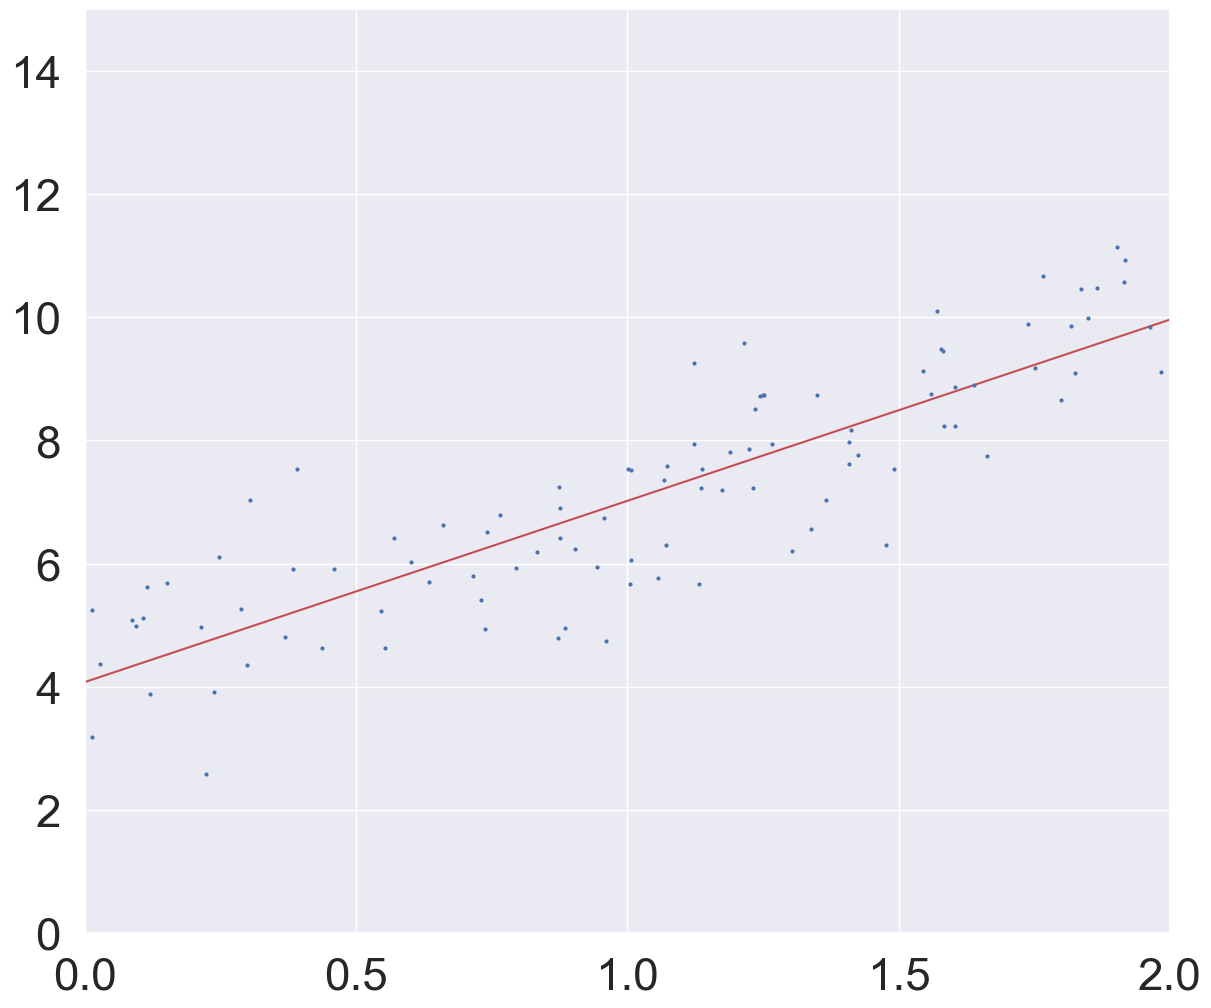

In [10]:
plt.figure(figsize=(14,12))
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [13]:
X_new = np.array([[0],[0.5],[1],[1.5], [2]])
X_new_b = np.c_[np.ones((5, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.07630632],
       [5.54696823],
       [7.01763013],
       [8.48829204],
       [9.95895394]])

In [14]:
X_new = np.array([[0],[0.5],[1],[1.5], [2]])
X_new_b = np.c_[np.ones((5, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b @ theta_best
y_predict

array([[4.07630632],
       [5.54696823],
       [7.01763013],
       [8.48829204],
       [9.95895394]])

In [15]:
y_new = 4 + 3 * X_new + np.random.randn(5, 1)

In [16]:
m = len(X_new)
cost = 1/(2*m) * ((y_predict - y_new).T @ (y_predict - y_new))
cost

array([[0.42747597]])

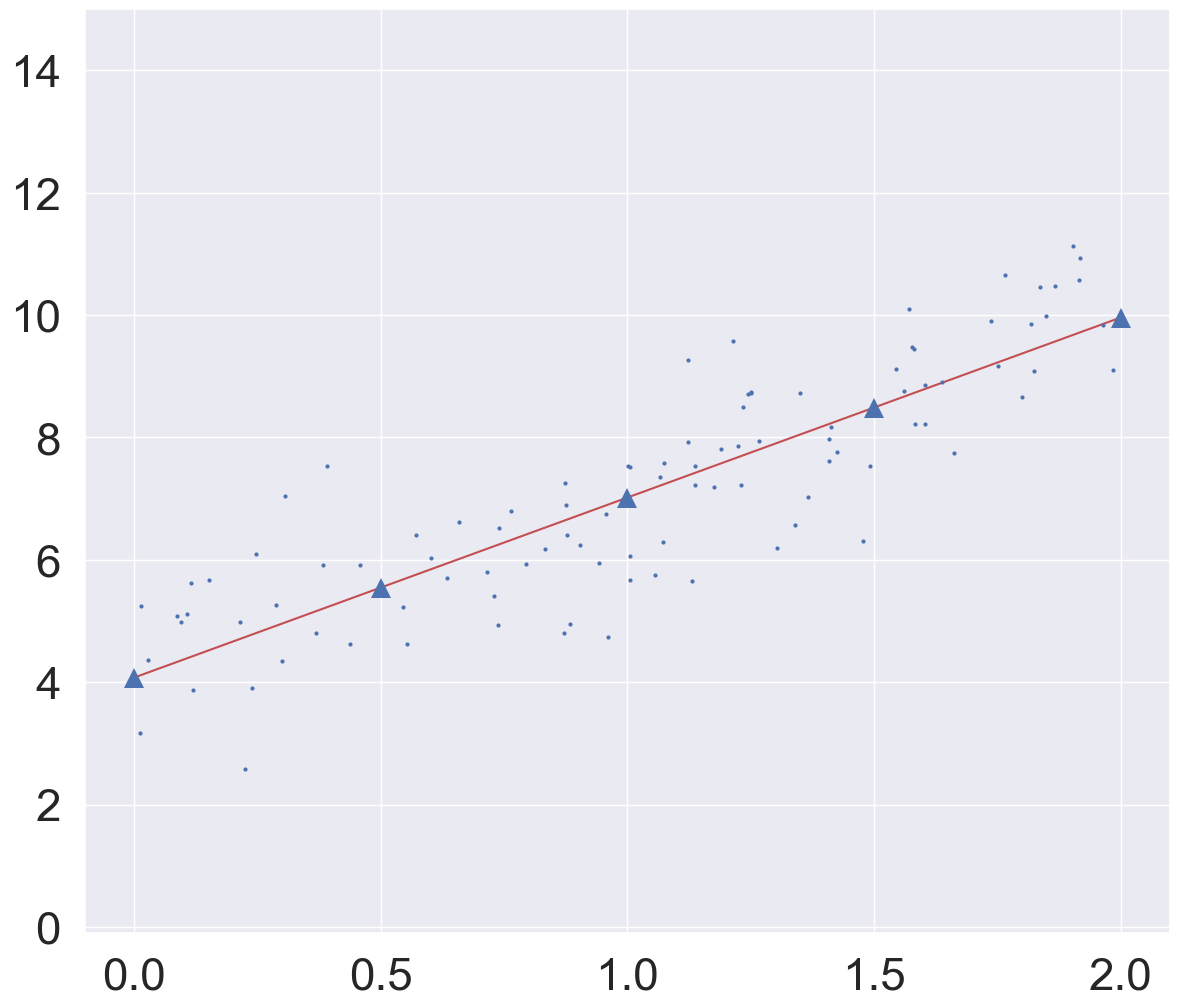

In [17]:
plt.figure(figsize=(14,12))
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.plot(X_new, y_predict, "b^", ms= 15)
plt.axis([-0.1, 2.1, -0.1, 15])
plt.show()

## Régression Linéaire

Voici le code équivalent lorsqu’on utilise **Scikit-Learn**

L’équation normale calcule l’inverse de $X^{T} ⋅ X$, qui est une matrice $(n + 1) × (n + 1)$ (où n est le nombre de variables). La complexité algorithmique d’une inversion de matrice de taille n × n se situe entre $O(n^{2,4})$ et $O(n^{3})$, selon l’algorithme d’inversion utilisé. Autrement dit, si vous doublez le nombre de variables, le temps de calcul est grosso modo multiplié par un facteur compris entre $2^{2,4} = 5,3$ et $2^{3} = 8$.

In [11]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.07630632]), array([[2.94132381]]))

In [13]:
y_pred = lin_reg.predict(X_new)

# Choix de la métrique de performance
## Mean absolute error


In [14]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y, lin_reg.predict(X))

0.783977240164605

## Mean squared error
$RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^n (f(x_i)-y_i)^2}$

In [15]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, lin_reg.predict(X))

0.9272583695173341

## Mean squared logarithmic error

$RMSLE = \sqrt{\frac{1}{n} \sum_{i=1}^n (\log(f(x_i)+1) - \log(y_i+1))^2}$

In [16]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y, lin_reg.predict(X))

0.017576195756205417

## Median absolute error

In [17]:
from sklearn.metrics import median_absolute_error
median_absolute_error(y, lin_reg.predict(X))

0.6697992616400401

## $R^{2}$ score, the coefficient of determination

$RSE = \frac{\sum_{i=1}^n (y_i - f(x_i))^2}{\sum_{i=1}^n (y_i - \bar{y})^2}$ avec $\bar{y} = \frac{1}{n} \sum_{i=1}^n y_i$  

$R = \frac{\sum_{i=1}^n (y_i - \bar y) (f(x_i) - \overline{f(x)})}{\sqrt{\sum_{i=1}^n (y_i - \bar y)^2} \sqrt{\sum_{i=1}^n (f(x_i) - \overline{f(x)})^2 }}$

In [18]:
from sklearn.metrics import r2_score
print(r2_score(y, lin_reg.predict(X)))
print(r2_score(y, lin_reg.predict(X), multioutput='variance_weighted'))
print(r2_score(y, lin_reg.predict(X), multioutput='uniform_average'))
print(r2_score(y, lin_reg.predict(X), multioutput='raw_values'))
print(sqrt(r2_score(y, lin_reg.predict(X))))

0.7407806151377188
0.7407806151377188
0.7407806151377188
[0.74078062]
0.8606861304434497


# La descente de gradient

In [25]:
def gradientDescent(X, y, theta, eta, n_iterations, costList, thetaList0, thetaList1):
    plt.figure(figsize=(14,12))
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # add x0 = 1 to each instance
    m = len(X_b)
    plt.plot(X, y, "b.")
    for iteration in range(n_iterations):
        if (iteration < 10) :
            y_predict = X_b @ theta
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X, y_predict, style)
            
        cost = 1/(2*m) * (((X_b @ theta) - y).T @ ((X_b @ theta) - y))
        costList.append(cost.ravel()[0])
        gradients = 2/m * (X_b.T @ ((X_b @ theta) - y))
        theta = theta - eta * gradients
        thetaList0.append(theta.ravel()[0])
        thetaList1.append(theta.ravel()[1])
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, -1, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

In [26]:
def gradientDescent(X, y, theta, eta, n_iterations, costList, thetaList0, thetaList1):
    plt.figure(figsize=(14,12))
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # add x0 = 1 to each instance
    m = len(X_b)
    plt.plot(X, y, "b.")
    for iteration in range(n_iterations):
        y_predict = X_b @ theta
        style = "b-" if iteration > 0 else "r--"
        style = "g-" if iteration == n_iterations - 1 else style
        plt.plot(X, y_predict, style)
            
        cost = 1/(2*m) * (((X_b @ theta) - y).T @ ((X_b @ theta) - y))
        costList.append(cost.ravel()[0])
        gradients = 2/m * (X_b.T @ ((X_b @ theta) - y))
        print(gradients)
        theta = theta - eta * gradients
        thetaList0.append(theta.ravel()[0])
        thetaList1.append(theta.ravel()[1])
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, -1, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)
    
    
    lin_reg = LinearRegression()
    lin_reg.fit(X, y)
    
    plt.plot(X, lin_reg.predict(X), "r-")

[[-14.2513053 ]
 [-16.57651051]]
[[-13.62257326]
 [-15.82314236]]
[[-13.0220366]
 [-15.1036201]]
[[-12.44842961]
 [-14.41642424]]
[[-11.90054343]
 [-13.76010347]]
[[-11.37722347]
 [-13.13327166]]
[[-10.87736697]
 [-12.53460491]]
[[-10.39992066]
 [-11.96283873]]
[[ -9.94387857]
 [-11.41676543]]
[[ -9.50827989]
 [-10.8952315 ]]


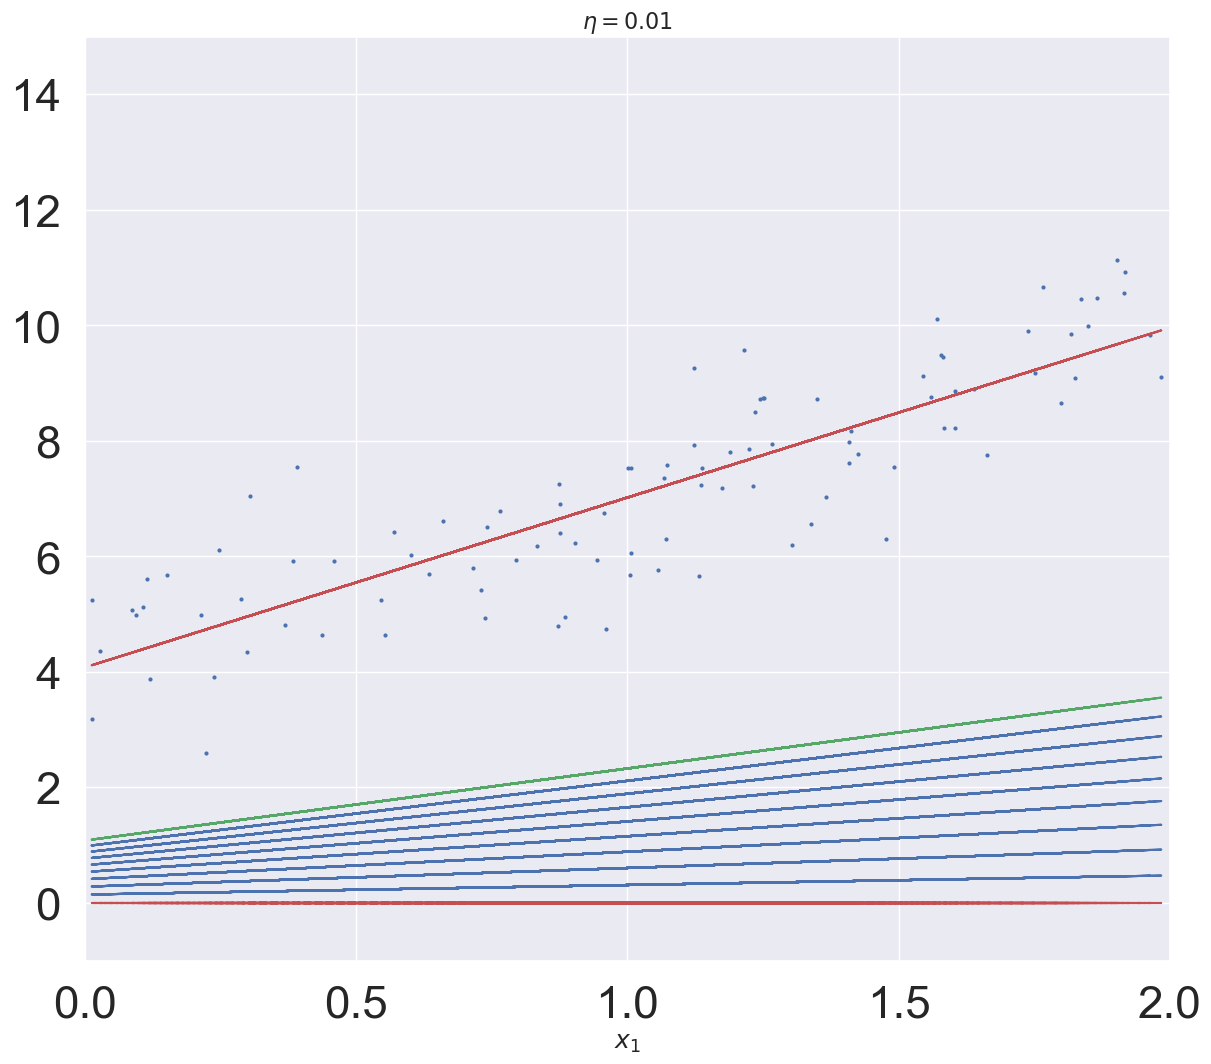

In [27]:
costList,thetaList0,thetaList1 = [],[],[]
gradientDescent(X, y, theta = array([[0],
       [0]]), eta = 0.01, n_iterations = 10, costList = costList, thetaList0=thetaList0, thetaList1=thetaList1)

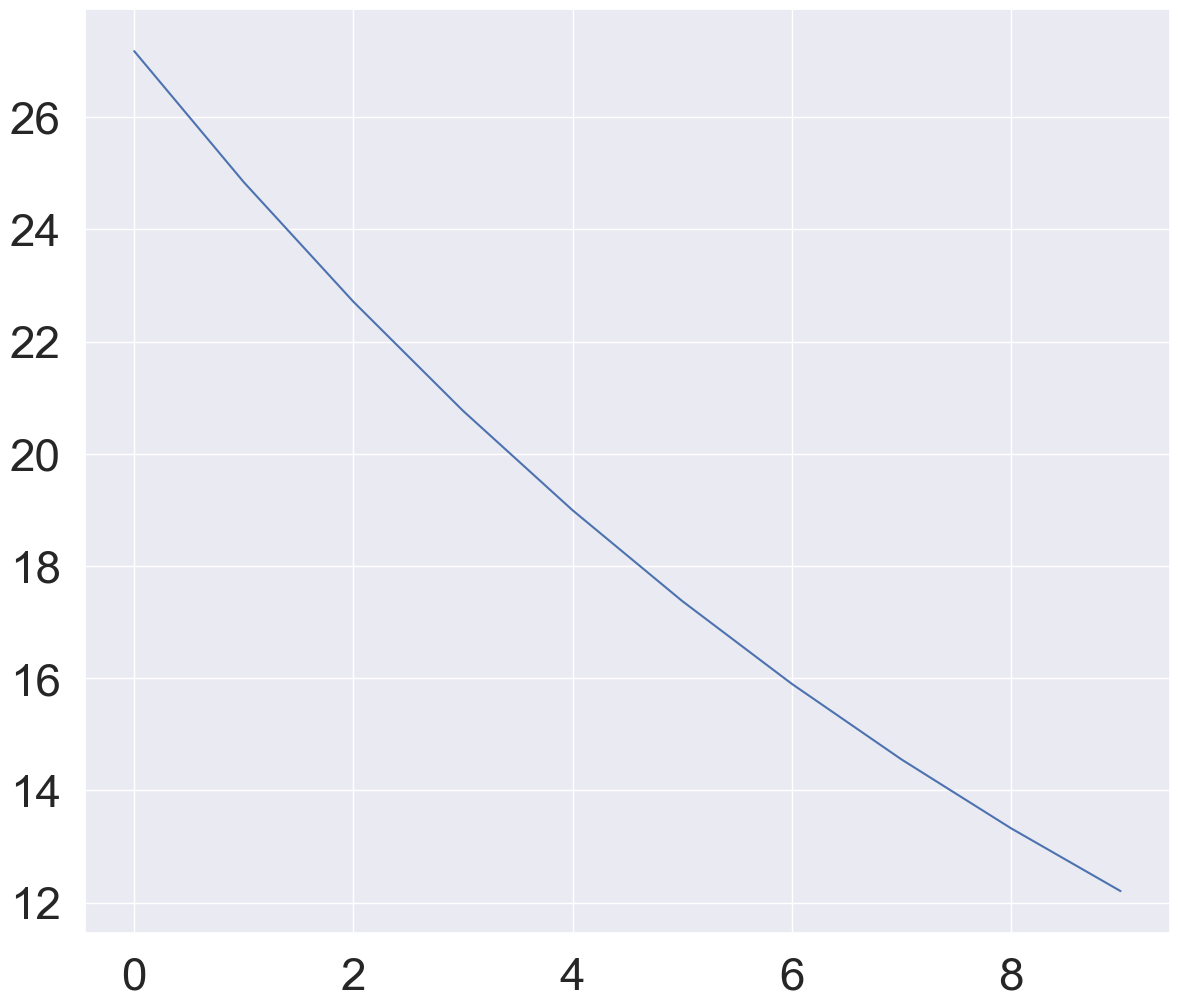

In [28]:
plt.figure(figsize=(14,12))
plt.plot(costList);

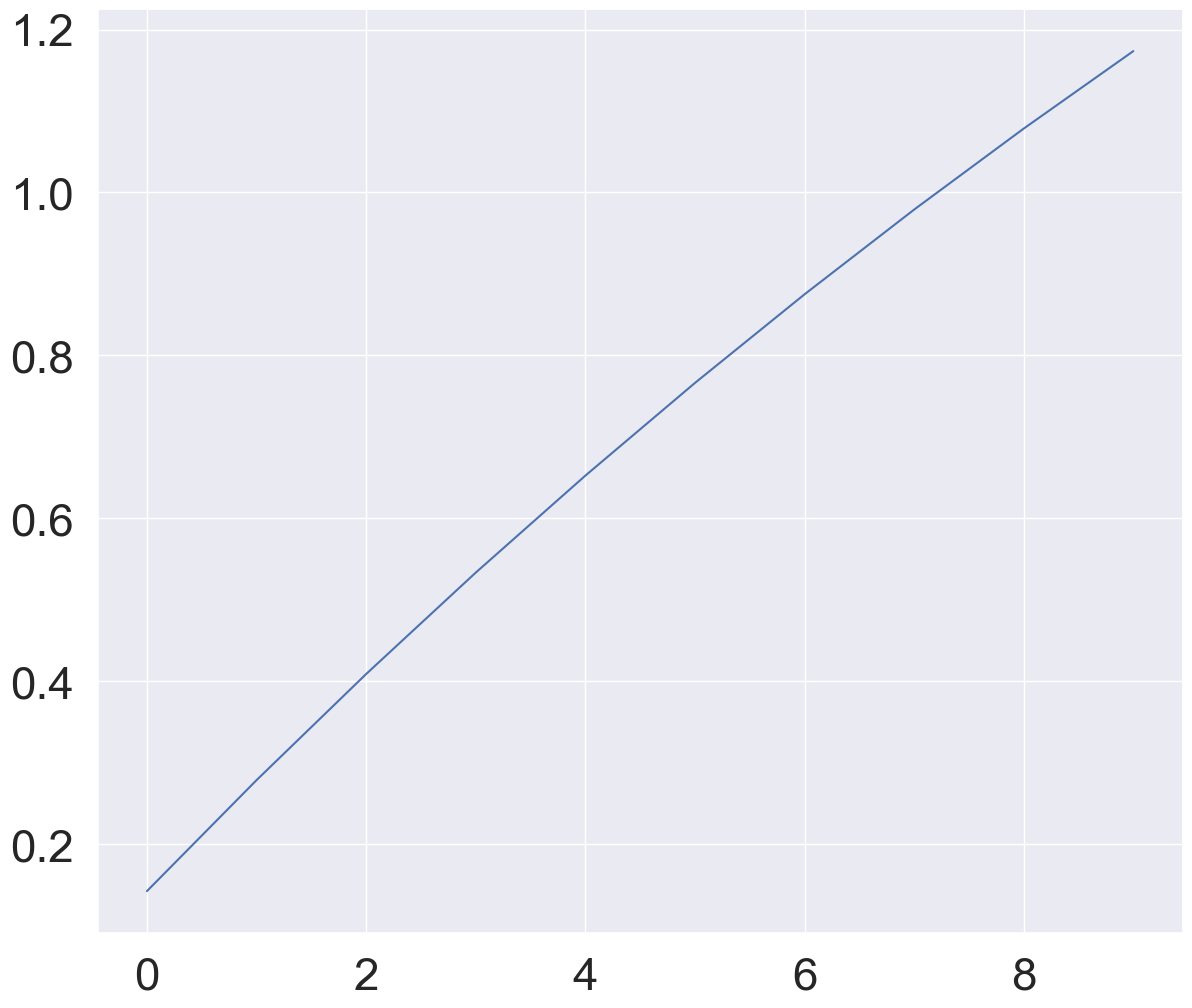

In [29]:
plt.figure(figsize=(14,12))
plt.plot(thetaList0);

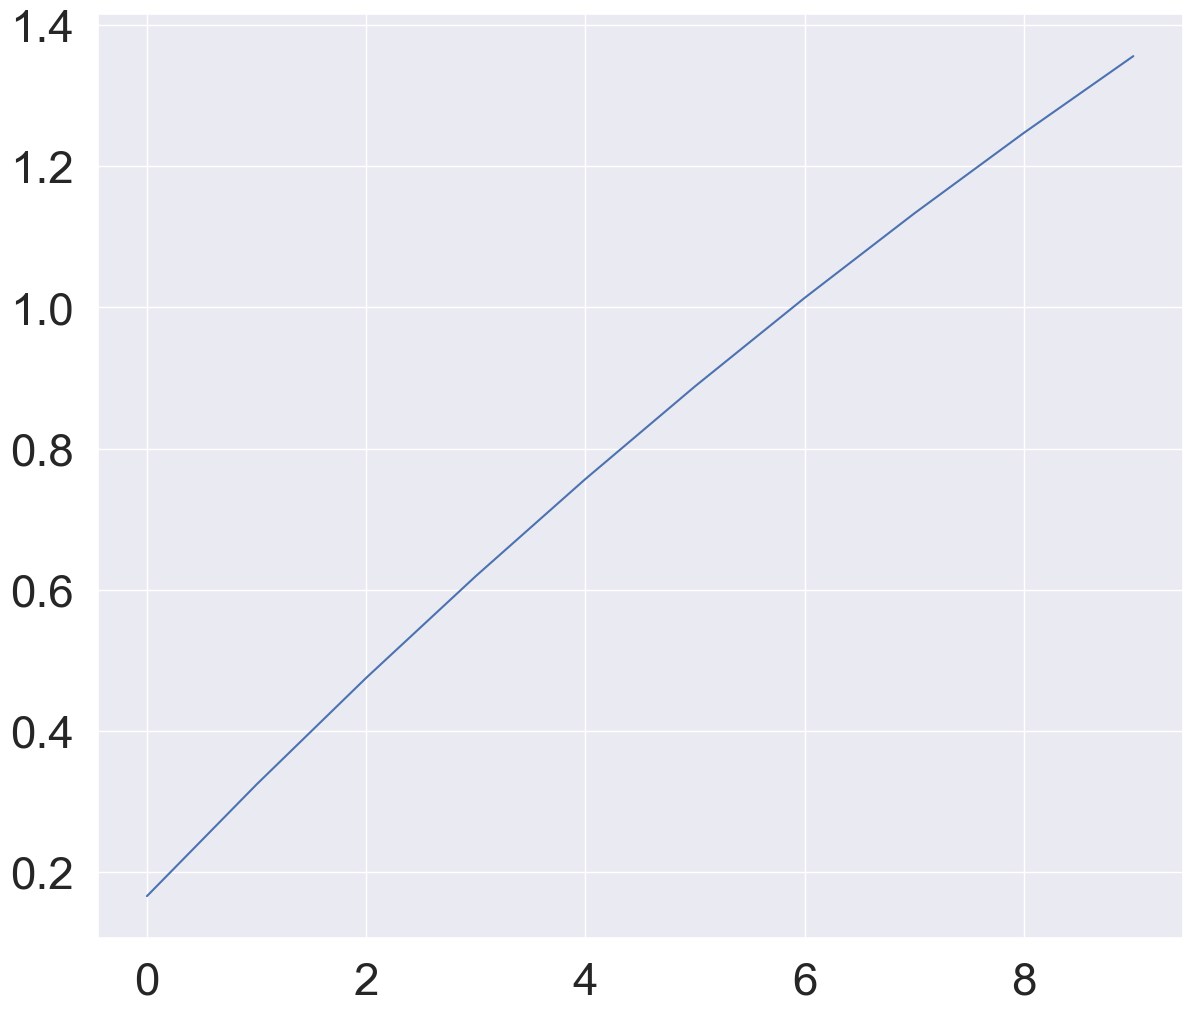

In [30]:
plt.figure(figsize=(14,12))
plt.plot(thetaList1);

[[-14.2513053 ]
 [-16.57651051]]
[[-13.62257326]
 [-15.82314236]]
[[-13.0220366]
 [-15.1036201]]
[[-12.44842961]
 [-14.41642424]]
[[-11.90054343]
 [-13.76010347]]
[[-11.37722347]
 [-13.13327166]]
[[-10.87736697]
 [-12.53460491]]
[[-10.39992066]
 [-11.96283873]]
[[ -9.94387857]
 [-11.41676543]]
[[ -9.50827989]
 [-10.8952315 ]]
[[ -9.09220694]
 [-10.39713524]]
[[-8.69478323]
 [-9.92142441]]
[[-8.31517163]
 [-9.46709398]]
[[-7.95257258]
 [-9.03318408]]
[[-7.60622243]
 [-8.61877789]]
[[-7.27539179]
 [-8.22299978]]
[[-6.95938403]
 [-7.84501342]]
[[-6.65753379]
 [-7.48402001]]
[[-6.36920558]
 [-7.13925664]]
[[-6.09379243]
 [-6.80999462]]
[[-5.83071464]
 [-6.49553799]]
[[-5.57941851]
 [-6.19522204]]
[[-5.33937521]
 [-5.90841187]]
[[-5.11007964]
 [-5.63450112]]
[[-4.89104939]
 [-5.37291063]]
[[-4.6818237 ]
 [-5.12308725]]
[[-4.48196249]
 [-4.88450265]]
[[-4.29104544]
 [-4.65665222]]
[[-4.1086711 ]
 [-4.43905403]]
[[-3.93445604]
 [-4.23124774]]
[[-3.76803404]
 [-4.03279372]]
[[-3.60905534]
 [-3

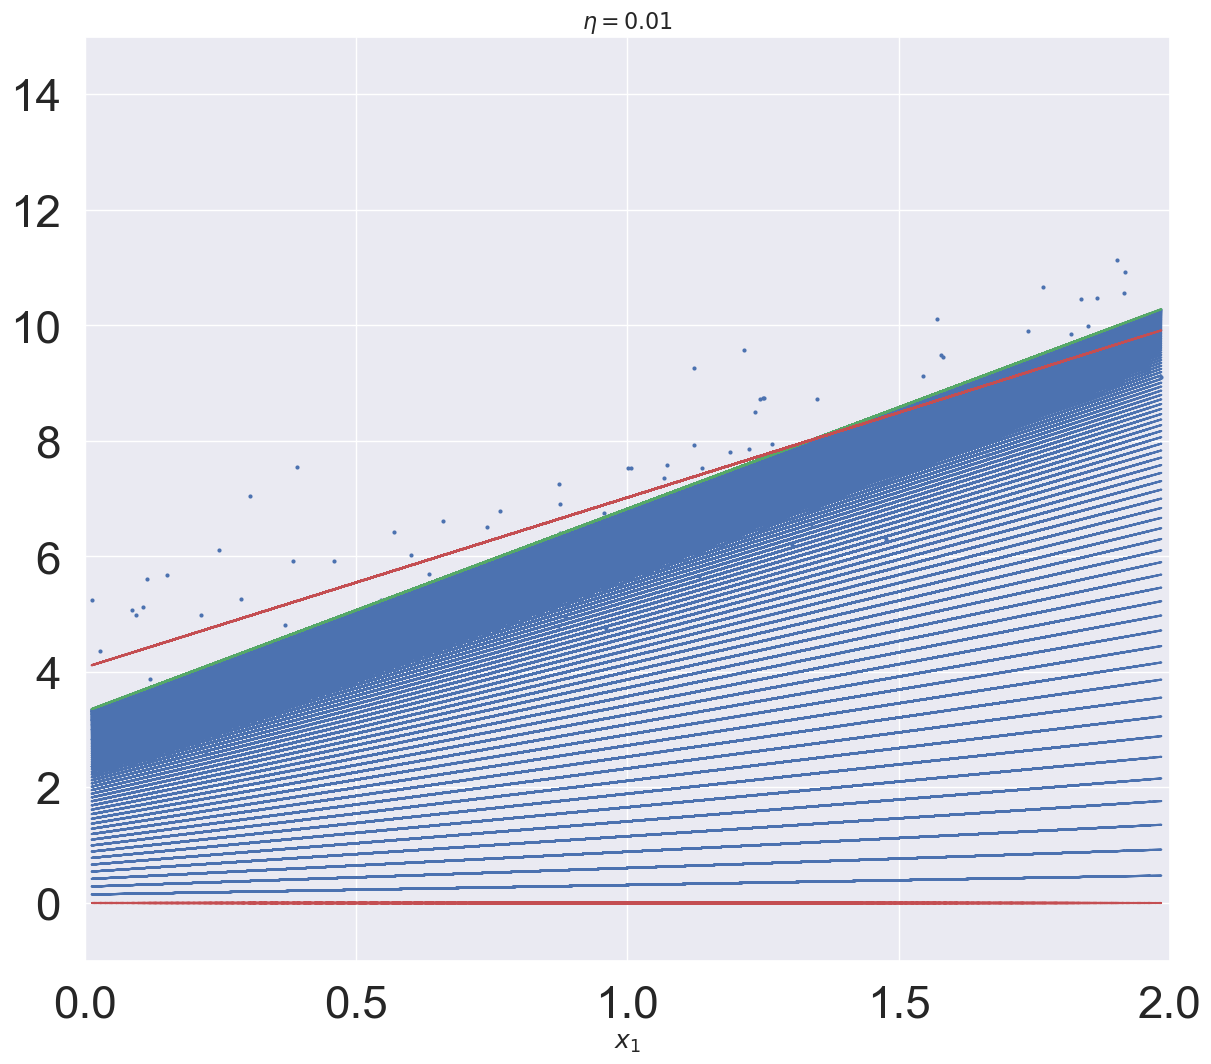

In [34]:
costList,thetaList0,thetaList1 = [],[],[]
gradientDescent(X, y, theta = array([[0],
       [0]]), eta = 0.01, n_iterations = 100, costList = costList, thetaList0=thetaList0, thetaList1=thetaList1)

[[-14.2513053 ]
 [-16.57651051]]
[[-13.62257326]
 [-15.82314236]]
[[-13.0220366]
 [-15.1036201]]
[[-12.44842961]
 [-14.41642424]]
[[-11.90054343]
 [-13.76010347]]
[[-11.37722347]
 [-13.13327166]]
[[-10.87736697]
 [-12.53460491]]
[[-10.39992066]
 [-11.96283873]]
[[ -9.94387857]
 [-11.41676543]]
[[ -9.50827989]
 [-10.8952315 ]]
[[ -9.09220694]
 [-10.39713524]]
[[-8.69478323]
 [-9.92142441]]
[[-8.31517163]
 [-9.46709398]]
[[-7.95257258]
 [-9.03318408]]
[[-7.60622243]
 [-8.61877789]]
[[-7.27539179]
 [-8.22299978]]
[[-6.95938403]
 [-7.84501342]]
[[-6.65753379]
 [-7.48402001]]
[[-6.36920558]
 [-7.13925664]]
[[-6.09379243]
 [-6.80999462]]
[[-5.83071464]
 [-6.49553799]]
[[-5.57941851]
 [-6.19522204]]
[[-5.33937521]
 [-5.90841187]]
[[-5.11007964]
 [-5.63450112]]
[[-4.89104939]
 [-5.37291063]]
[[-4.6818237 ]
 [-5.12308725]]
[[-4.48196249]
 [-4.88450265]]
[[-4.29104544]
 [-4.65665222]]
[[-4.1086711 ]
 [-4.43905403]]
[[-3.93445604]
 [-4.23124774]]
[[-3.76803404]
 [-4.03279372]]
[[-3.60905534]
 [-3

[[-0.10235074]
 [ 0.08524951]]
[[-0.10207133]
 [ 0.08501695]]
[[-0.10179269]
 [ 0.08478503]]
[[-0.10151481]
 [ 0.08455373]]
[[-0.1012377 ]
 [ 0.08432306]]
[[-0.10096134]
 [ 0.08409301]]
[[-0.10068574]
 [ 0.08386359]]
[[-0.1004109 ]
 [ 0.08363479]]
[[-0.10013681]
 [ 0.08340661]]
[[-0.09986347]
 [ 0.08317905]]
[[-0.09959087]
 [ 0.08295211]]
[[-0.09931903]
 [ 0.08272579]]
[[-0.09904793]
 [ 0.08250008]]
[[-0.09877757]
 [ 0.08227498]]
[[-0.09850795]
 [ 0.0820505 ]]
[[-0.09823907]
 [ 0.08182663]]
[[-0.09797092]
 [ 0.08160336]]
[[-0.09770351]
 [ 0.0813807 ]]
[[-0.09743683]
 [ 0.08115865]]
[[-0.09717088]
 [ 0.0809372 ]]
[[-0.09690565]
 [ 0.08071636]]
[[-0.09664116]
 [ 0.08049611]]
[[-0.09637738]
 [ 0.08027647]]
[[-0.09611433]
 [ 0.08005742]]
[[-0.09585199]
 [ 0.07983897]]
[[-0.09559037]
 [ 0.07962111]]
[[-0.09532947]
 [ 0.07940385]]
[[-0.09506928]
 [ 0.07918718]]
[[-0.09480981]
 [ 0.07897109]]
[[-0.09455104]
 [ 0.0787556 ]]
[[-0.09429298]
 [ 0.07854069]]
[[-0.09403562]
 [ 0.07832637]]
[[-0.093

[[-0.04187748]
 [ 0.034882  ]]
[[-0.04176319]
 [ 0.0347868 ]]
[[-0.04164921]
 [ 0.03469186]]
[[-0.04153555]
 [ 0.03459718]]
[[-0.04142219]
 [ 0.03450277]]
[[-0.04130915]
 [ 0.0344086 ]]
[[-0.04119641]
 [ 0.0343147 ]]
[[-0.04108398]
 [ 0.03422105]]
[[-0.04097186]
 [ 0.03412766]]
[[-0.04086004]
 [ 0.03403452]]
[[-0.04074853]
 [ 0.03394164]]
[[-0.04063732]
 [ 0.033849  ]]
[[-0.04052642]
 [ 0.03375663]]
[[-0.04041582]
 [ 0.0336645 ]]
[[-0.04030552]
 [ 0.03357263]]
[[-0.04019552]
 [ 0.033481  ]]
[[-0.04008582]
 [ 0.03338963]]
[[-0.03997642]
 [ 0.03329851]]
[[-0.03986732]
 [ 0.03320763]]
[[-0.03975852]
 [ 0.033117  ]]
[[-0.03965001]
 [ 0.03302662]]
[[-0.03954181]
 [ 0.03293649]]
[[-0.03943389]
 [ 0.0328466 ]]
[[-0.03932627]
 [ 0.03275696]]
[[-0.03921895]
 [ 0.03266756]]
[[-0.03911191]
 [ 0.03257841]]
[[-0.03900517]
 [ 0.0324895 ]]
[[-0.03889872]
 [ 0.03240083]]
[[-0.03879256]
 [ 0.03231241]]
[[-0.0386867 ]
 [ 0.03222422]]
[[-0.03858112]
 [ 0.03213628]]
[[-0.03847582]
 [ 0.03204858]]
[[-0.038

[[-0.01819655]
 [ 0.01515688]]
[[-0.01814689]
 [ 0.01511552]]
[[-0.01809736]
 [ 0.01507427]]
[[-0.01804797]
 [ 0.01503313]]
[[-0.01799872]
 [ 0.0149921 ]]
[[-0.0179496 ]
 [ 0.01495118]]
[[-0.01790061]
 [ 0.01491038]]
[[-0.01785176]
 [ 0.01486969]]
[[-0.01780304]
 [ 0.01482911]]
[[-0.01775445]
 [ 0.01478864]]
[[-0.017706  ]
 [ 0.01474828]]
[[-0.01765768]
 [ 0.01470803]]
[[-0.01760949]
 [ 0.01466789]]
[[-0.01756143]
 [ 0.01462786]]
[[-0.0175135 ]
 [ 0.01458794]]
[[-0.01746571]
 [ 0.01454812]]
[[-0.01741804]
 [ 0.01450842]]
[[-0.01737051]
 [ 0.01446883]]
[[-0.0173231 ]
 [ 0.01442934]]
[[-0.01727582]
 [ 0.01438996]]
[[-0.01722868]
 [ 0.01435069]]
[[-0.01718166]
 [ 0.01431152]]
[[-0.01713477]
 [ 0.01427247]]
[[-0.017088  ]
 [ 0.01423351]]


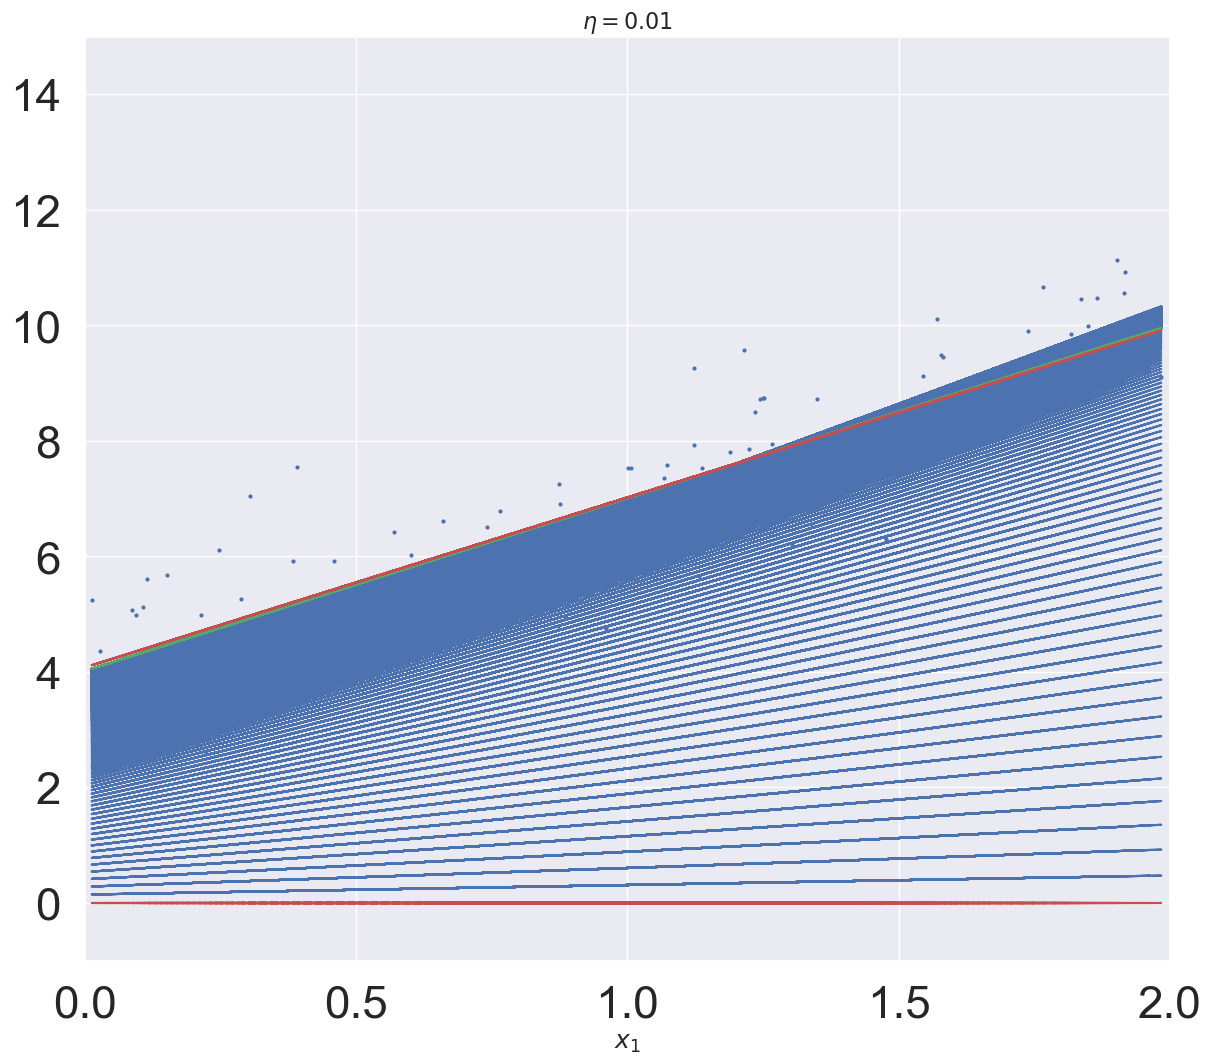

In [31]:
costList,thetaList0,thetaList1 = [],[],[]
gradientDescent(X, y, theta = array([[0],
       [0]]), eta = 0.01, n_iterations = 1000, costList = costList, thetaList0=thetaList0, thetaList1=thetaList1)

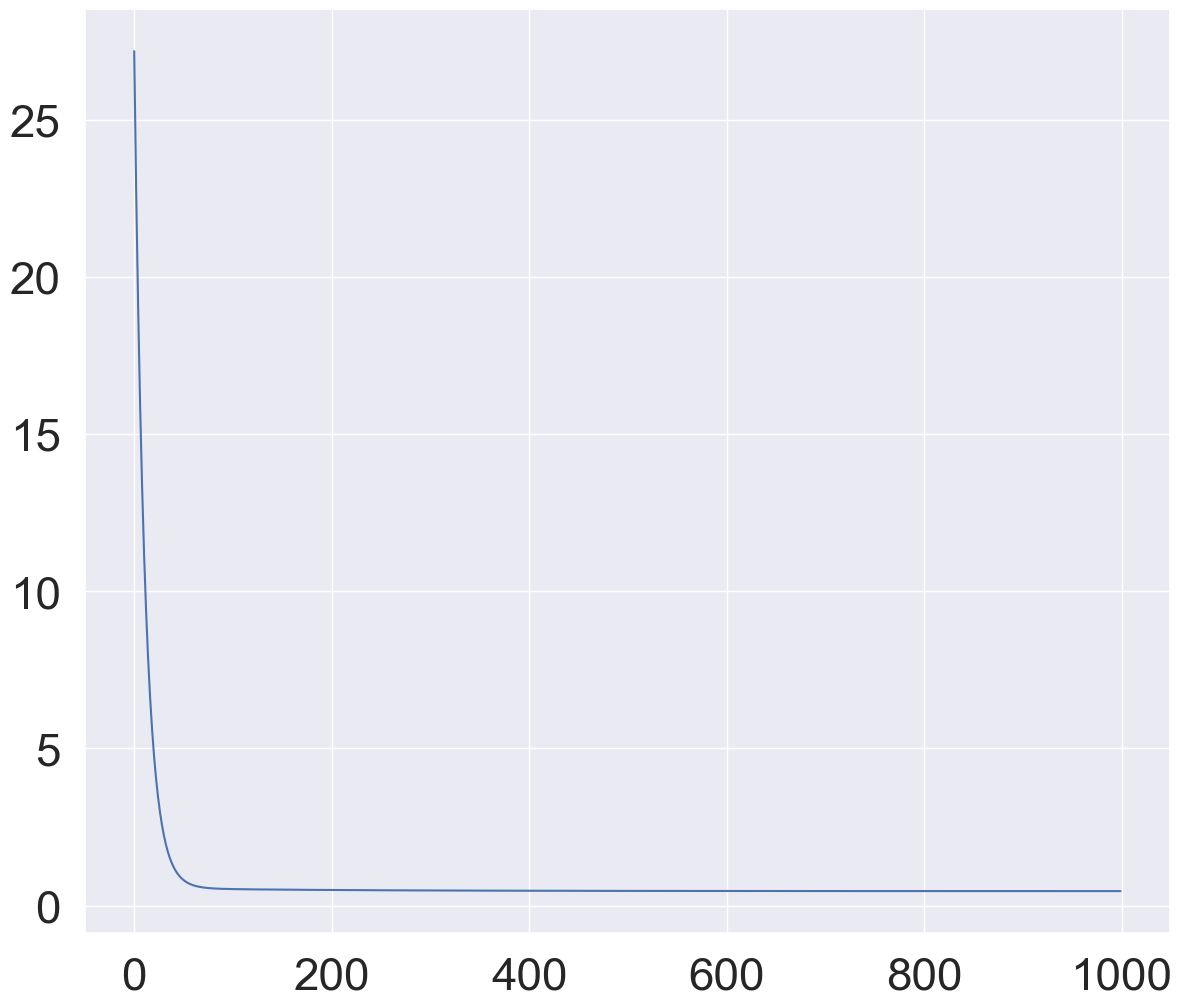

In [32]:
plt.figure(figsize=(14,12))
plt.plot(costList);

In [35]:
y_new = 4 + 3 * X_new + np.random.randn(5, 1)

In [36]:
cost = 1/(2*m) * ((y_predict - y).T @ (y_predict - y))

ValueError: operands could not be broadcast together with shapes (5,1) (100,1) 

In [37]:
t0 = time.time()       
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    cost = 1/(2*m) * (((X_b @ theta) - y).T @ ((X_b @ theta) - y))
    gradients = 2/m * (X_b.T @ ((X_b @ theta) - y))
    theta = theta - eta * gradients
t1 = time.time()        
print('Exécution  :'+('%.5fs' % (t1 - t0)).lstrip('0'))    

Exécution  :.01597s


In [38]:
cost,theta

(array([[0.46362918]]),
 array([[4.07630632],
        [2.94132381]]))

In [39]:
X_new_b @ theta

array([[4.07630632],
       [5.54696823],
       [7.01763013],
       [8.48829204],
       [9.95895394]])

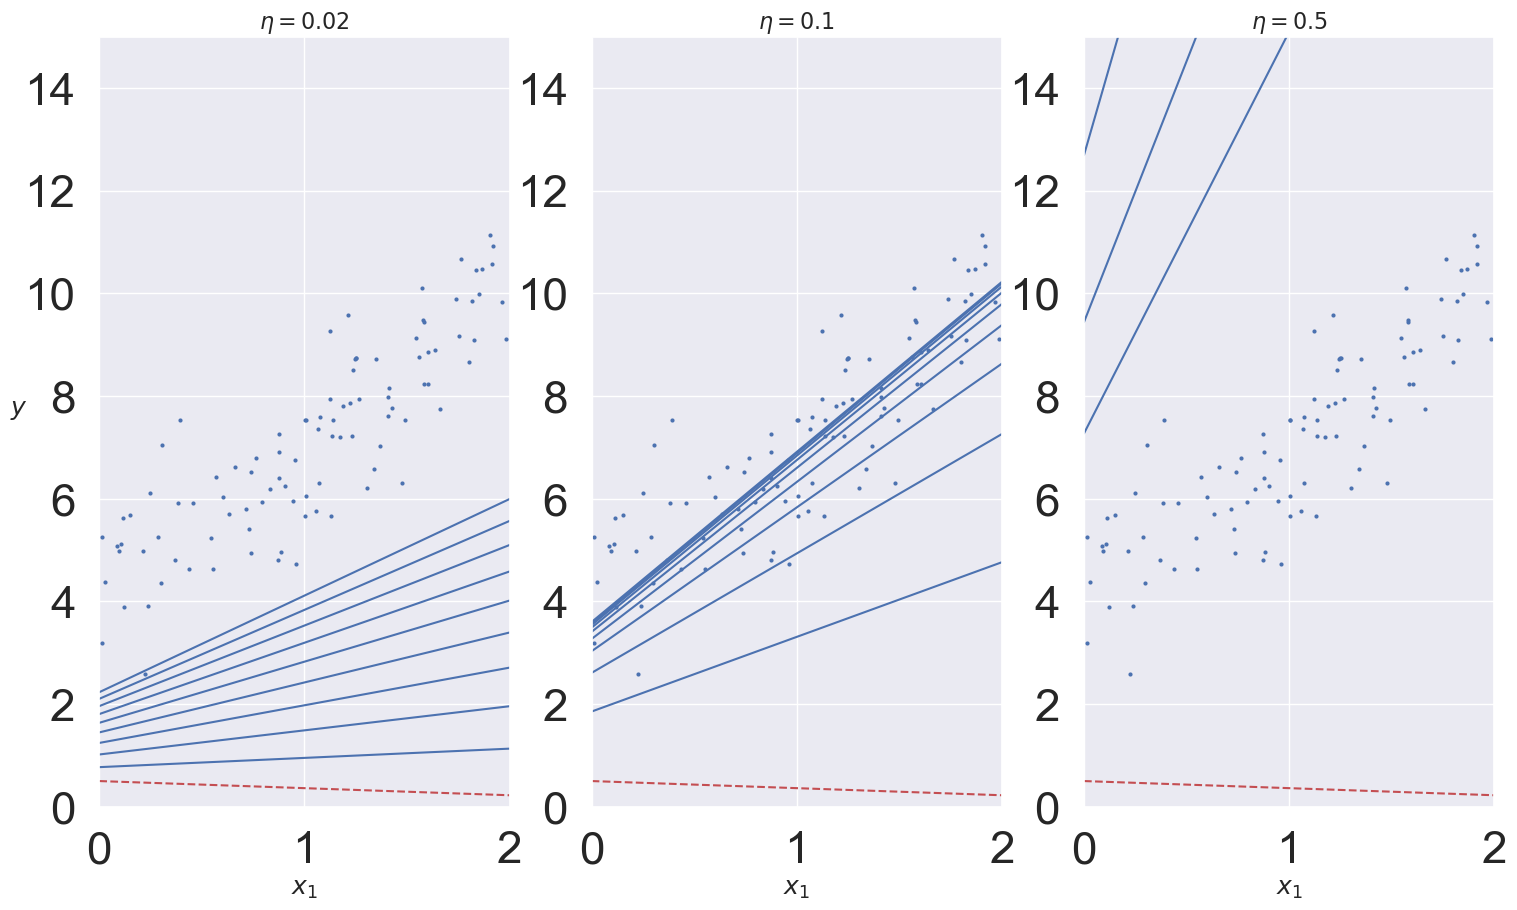

In [40]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    #plt.figure(figsize=(14,12))
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

np.random.seed(42)
theta = np.random.randn(2,1)

plt.figure(figsize=(18,10))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

NameError: name 'x' is not defined

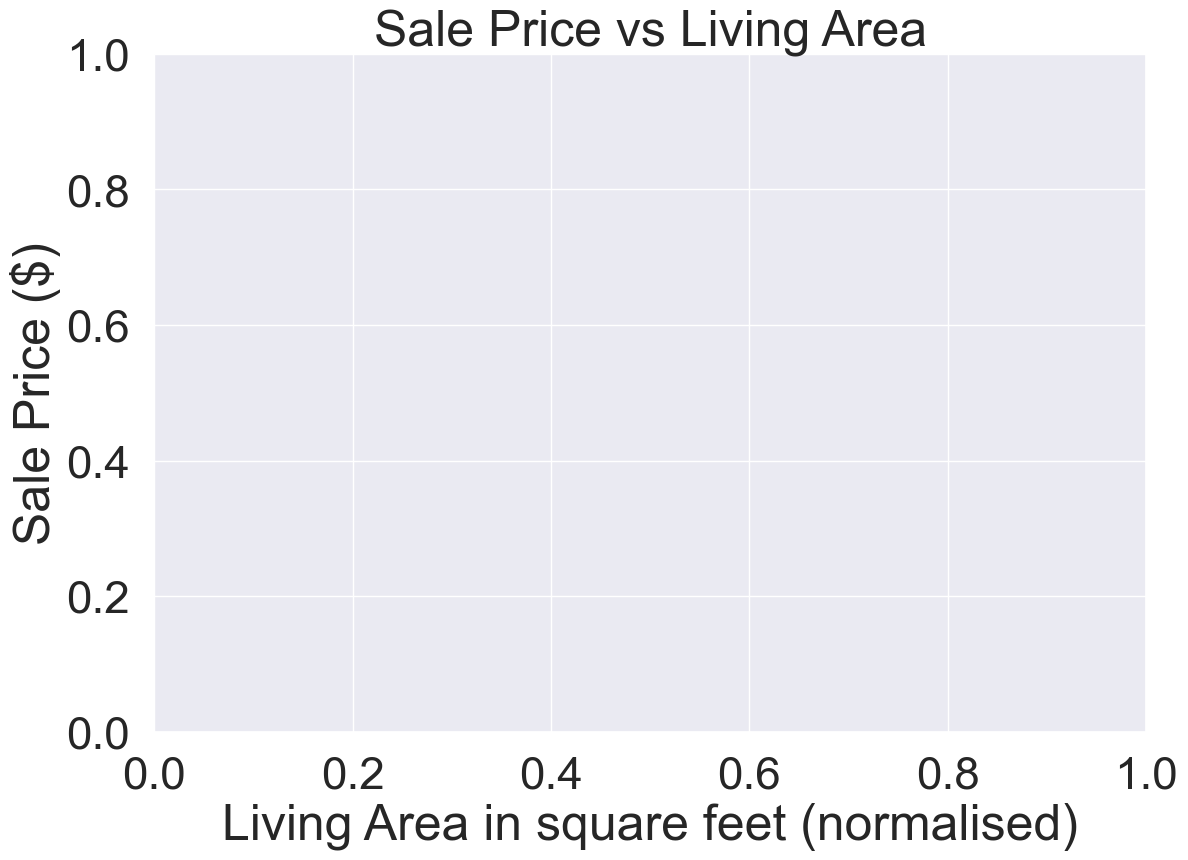

In [33]:
#Animation

#Set the plot up,
fig = plt.figure()
ax = plt.axes()
plt.title('Sale Price vs Living Area')
plt.xlabel('Living Area in square feet (normalised)')
plt.ylabel('Sale Price ($)')
plt.scatter(x[:,1], y, color='red')
line, = ax.plot([], [], lw=2)
annotation = ax.text(-1, 700000, '')
annotation.set_animated(True)
plt.close()

#Generate the animation data,
def init():
    line.set_data([], [])
    annotation.set_text('')
    return line, annotation

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(-5, 20, 1000)
    y = past_thetas[i][1]*x + past_thetas[i][0]
    line.set_data(x, y)
    annotation.set_text('Cost = %.2f e10' % (past_costs[i]/10000000000))
    return line, annotation

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=300, interval=0, blit=True)

anim.save('animation.gif', writer='imagemagick', fps = 30)

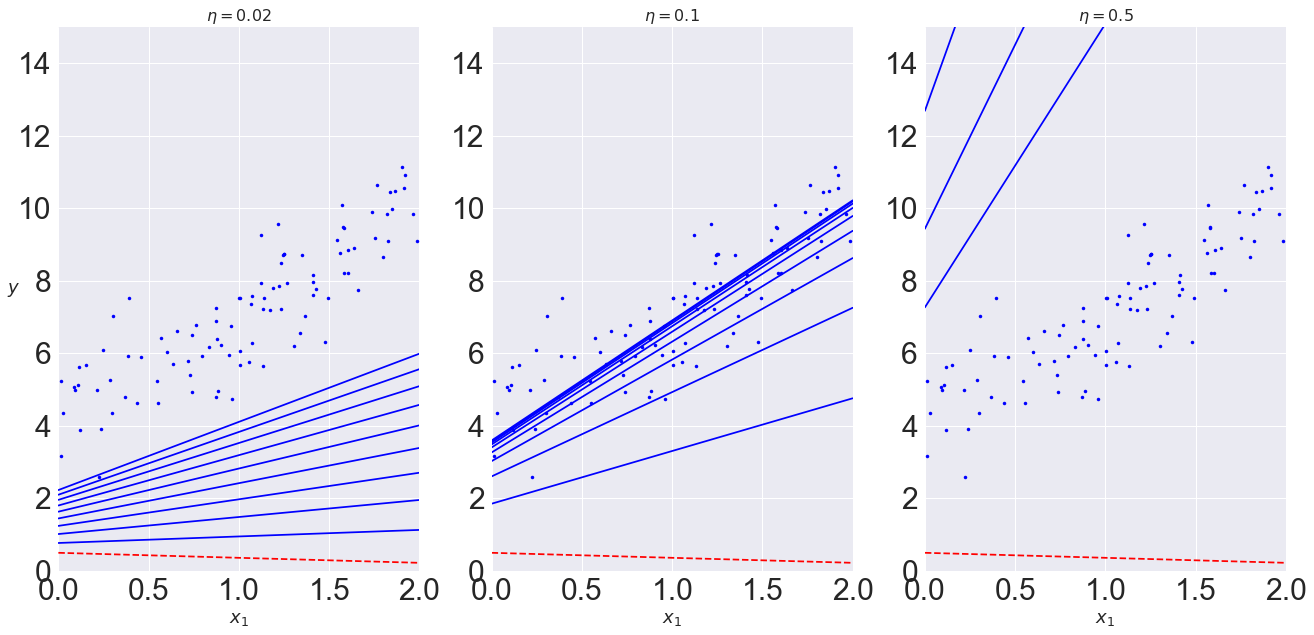

In [43]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(22,10))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

la normalisation avec NumPy

In [24]:
X_norm = (X - X.mean(axis=0)) / X.std(axis=0)

Ou bien vous pouvez utiliser la classe StandardScaler de Scikit-Learn

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

## Descente de gradient stochastique

In [26]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

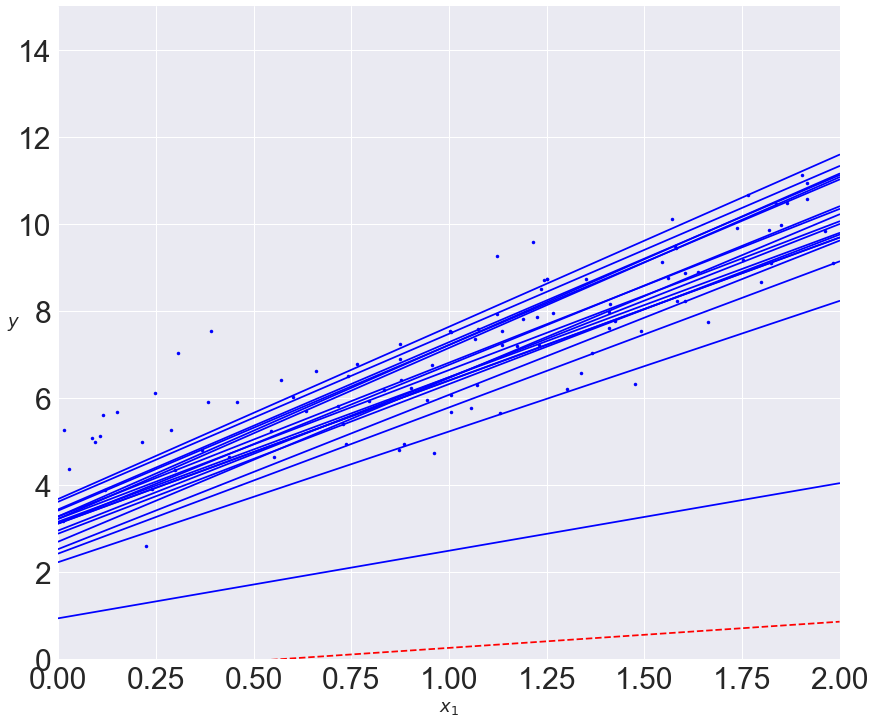

In [36]:
n_epochs = 50
t0, t1 = 5, 50  

def learning_schedule(t):
    return t0 / (t + t1)

plt.figure(figsize=(14,12))        

theta = np.random.randn(2,1)  

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)        
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 

plt.plot(X, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                              
                                
plt.show() 

In [37]:
theta

array([[4.00944516],
       [2.94013463]])

In [38]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=50, n_iter=None, penalty=None,
       power_t=0.25, random_state=42, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [39]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.04011399]), array([2.89796597]))